# OllamaBench Evaluation Notebook (07.07.2025)


## Comparison to Chatbot Arena

This notebook provides a comparative analysis of ELO scores for various Large Language Models (LLMs) from two different sources: the public `LMArena.ai` and a personal `Meine LLM Arena`. We will visualize the data to understand the similarities, differences, and potential correlations between the two rating systems.

findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond'

Diagramm wurde als 'vergleich_chatbot_arena.png' gespeichert.


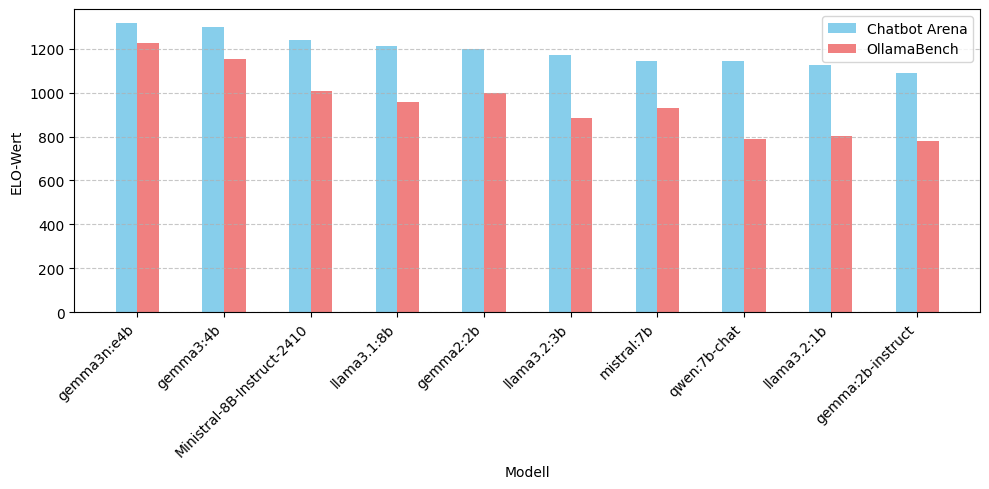

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


my_arena_data = [
    {"Model": "gemma3n:e4b", "Avg ELO": 1229.0},
    {"Model": "gemma3:4b", "Avg ELO": 1153.1},
    {"Model": "Ministral-8B-Instruct-2410", "Avg ELO": 1008.6},
    {"Model": "gemma2:2b", "Avg ELO": 997.1},
    {"Model": "llama3.1:8b", "Avg ELO": 956.1},
    {"Model": "mistral:7b", "Avg ELO": 929.8},
    {"Model": "llama3.2:3b", "Avg ELO": 883.2},
    {"Model": "llama3.2:1b", "Avg ELO": 803.3},
    {"Model": "qwen:7b-chat", "Avg ELO": 788.9},
    {"Model": "gemma:2b-instruct", "Avg ELO": 780.6},
]
lm_arena_data = [
    {"Model": "gemma3n:e4b", "Avg ELO": 1316},
    {"Model": "gemma3:4b", "Avg ELO": 1301},
    {"Model": "Ministral-8B-Instruct-2410", "Avg ELO": 1240},
    {"Model": "llama3.1:8b", "Avg ELO": 1213},
    {"Model": "gemma2:2b", "Avg ELO": 1198},
    {"Model": "llama3.2:3b", "Avg ELO": 1173},
     {"Model": "mistral:7b", "Avg ELO": 1147},
    {"Model": "qwen:7b-chat", "Avg ELO": 1145},
    {"Model": "llama3.2:1b", "Avg ELO": 1125},
    {"Model": "gemma:2b-instruct", "Avg ELO": 1088},
]
df_lm_arena = pd.DataFrame(lm_arena_data)
df_lm_arena['Source'] = 'LMArena.ai'

df_my_arena = pd.DataFrame(my_arena_data)
df_my_arena['Source'] = 'Meine LLM Arena'

df_combined = pd.concat([df_lm_arena, df_my_arena])

# Establish the model order based on LMArena.ai ELO scores
model_order = df_lm_arena.sort_values(by='Avg ELO', ascending=False)['Model'].tolist()
df_combined['Model'] = pd.Categorical(df_combined['Model'], categories=model_order, ordered=True)
df_combined = df_combined.sort_values(by=['Model', 'Source'])

# Set the figure size
plt.figure(figsize=(10, 5)) 

# --- CHANGE HERE ---
# The width of the bars. A smaller number makes them thinner.
bar_width = 0.25

# Get unique models and set up the positions for the bars
models = df_combined['Model'].unique()
ind = np.arange(len(models))

# Get ELO scores for LMArena.ai and plot them
lm_arena_elos = df_combined[df_combined['Source'] == 'LMArena.ai'].set_index('Model').loc[models]['Avg ELO']
plt.bar(ind - bar_width/2, lm_arena_elos, bar_width, label='Chatbot Arena', color='skyblue')

# Get ELO scores for your arena and plot them
my_arena_elos = df_combined[df_combined['Source'] == 'Meine LLM Arena'].set_index('Model').loc[models]['Avg ELO']
plt.bar(ind + bar_width/2, my_arena_elos, bar_width, label='OllamaBench', color='lightcoral')

# Add labels, title, and legend
plt.xlabel('Modell')
plt.ylabel('ELO-Wert')
plt.xticks(ind, models, rotation=45, ha='right') 
plt.legend() 
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent labels from being cut off
plt.tight_layout() 

# Display the plot

output_filename = 'vergleich_chatbot_arena.png'
plt.savefig(output_filename, dpi=300, bbox_inches='tight', transparent=False)
print(f"Diagramm wurde als '{output_filename}' gespeichert.")
plt.show()


### Conclusion
The analysis reveals two key findings:  
1.  **Strong Correlation:** The relative ranking of models is highly consistent between `LMArena.ai` and `Meine LLM Arena`. Models that perform well in one arena tend to perform well in the other.  
2.  **Systematic ELO Difference:** There is a consistent offset in the scores, with `LMArena.ai` providing significantly higher ELO ratings across the board. The average ELO score is over 200 points higher on `LMArena.ai`. This could be due to differences in the pool of voters, the types of prompts used, or the underlying ELO calculation methodology.  
Overall, while the absolute numbers differ, `Meine LLM Arena` appears to produce a relative ranking of models that is in good agreement with the larger, public `LMArena.ai`.  

## Overall Validity Check


| Rang | Modell | Avg ELO | W/L/D |
|:----:|:------------------------------------------|--------:|:-----------:|
| 1 | `qwen3:8b` | 1248.3 | 181/10/103 |
| 2 | `gemma3n:e4b` | 1229.0 | 158/22/112 |
| 3 | `qwen3:4b` | 1209.5 | 153/14/124 |
| 4 | `gemma3:4b` | 1153.1 | 130/34/115 |
| 5 | `qwen3:1.7b` | 1110.0 | 117/40/130 |
| 6 | `Ministral-8B-Instruct-2410-Q4_K_M:latest` | 1008.6 | 79/74/143 |
| 7 | `gemma2:2b` | 997.1 | 59/71/134 |
| 8 | `gemma3:1b` | 992.8 | 72/89/124 |
| 9 | `llama3.1:8b` | 956.1 | 51/78/130 |
| 10 | `mistral:7b` | 929.8 | 51/107/129 |
| 11 | `qwen3:0.6b` | 909.6 | 27/69/185 |
| 12 | `llama3.2:3b` | 883.2 | 37/119/120 |
| 13 | `llama3.2:1b` | 803.3 | 14/146/124 |
| 14 | `qwen:7b-chat` | 788.9 | 14/137/101 |
| 15 | `gemma:2b-instruct` | 780.6 | 7/140/124 |


The provided leaderboard data demonstrates strong internal consistency and appears valid for documentation purposes. The credibility of the results is supported by two key observations:

1.  **Logical Performance Scaling:** There is a clear and logical hierarchy within model families. Performance, as measured by ELO, scales directly with model size. For example, the `Qwen3` series is ranked in perfect order of parameter count (`8b > 4b > 1.7b > 0.6b`). This predictable trend holds true for the other model families (`Gemma3`, `Llama`) as well.

2.  **Correlation of ELO and Win/Loss Record:** The ELO rankings are strongly supported by the `W/L/D` statistics. Models with higher ELO scores have a significantly positive win-to-loss ratio, while models at the bottom of the table have a highly negative ratio. This direct relationship confirms that the ELO scores accurately reflect the models' performance in the benchmark.

These factors indicate that the evaluation methodology was applied consistently and that the resulting rankings are a credible representation of the models' relative performance.


findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond'

Diagramm wurde als 'radar_chart.png' gespeichert.


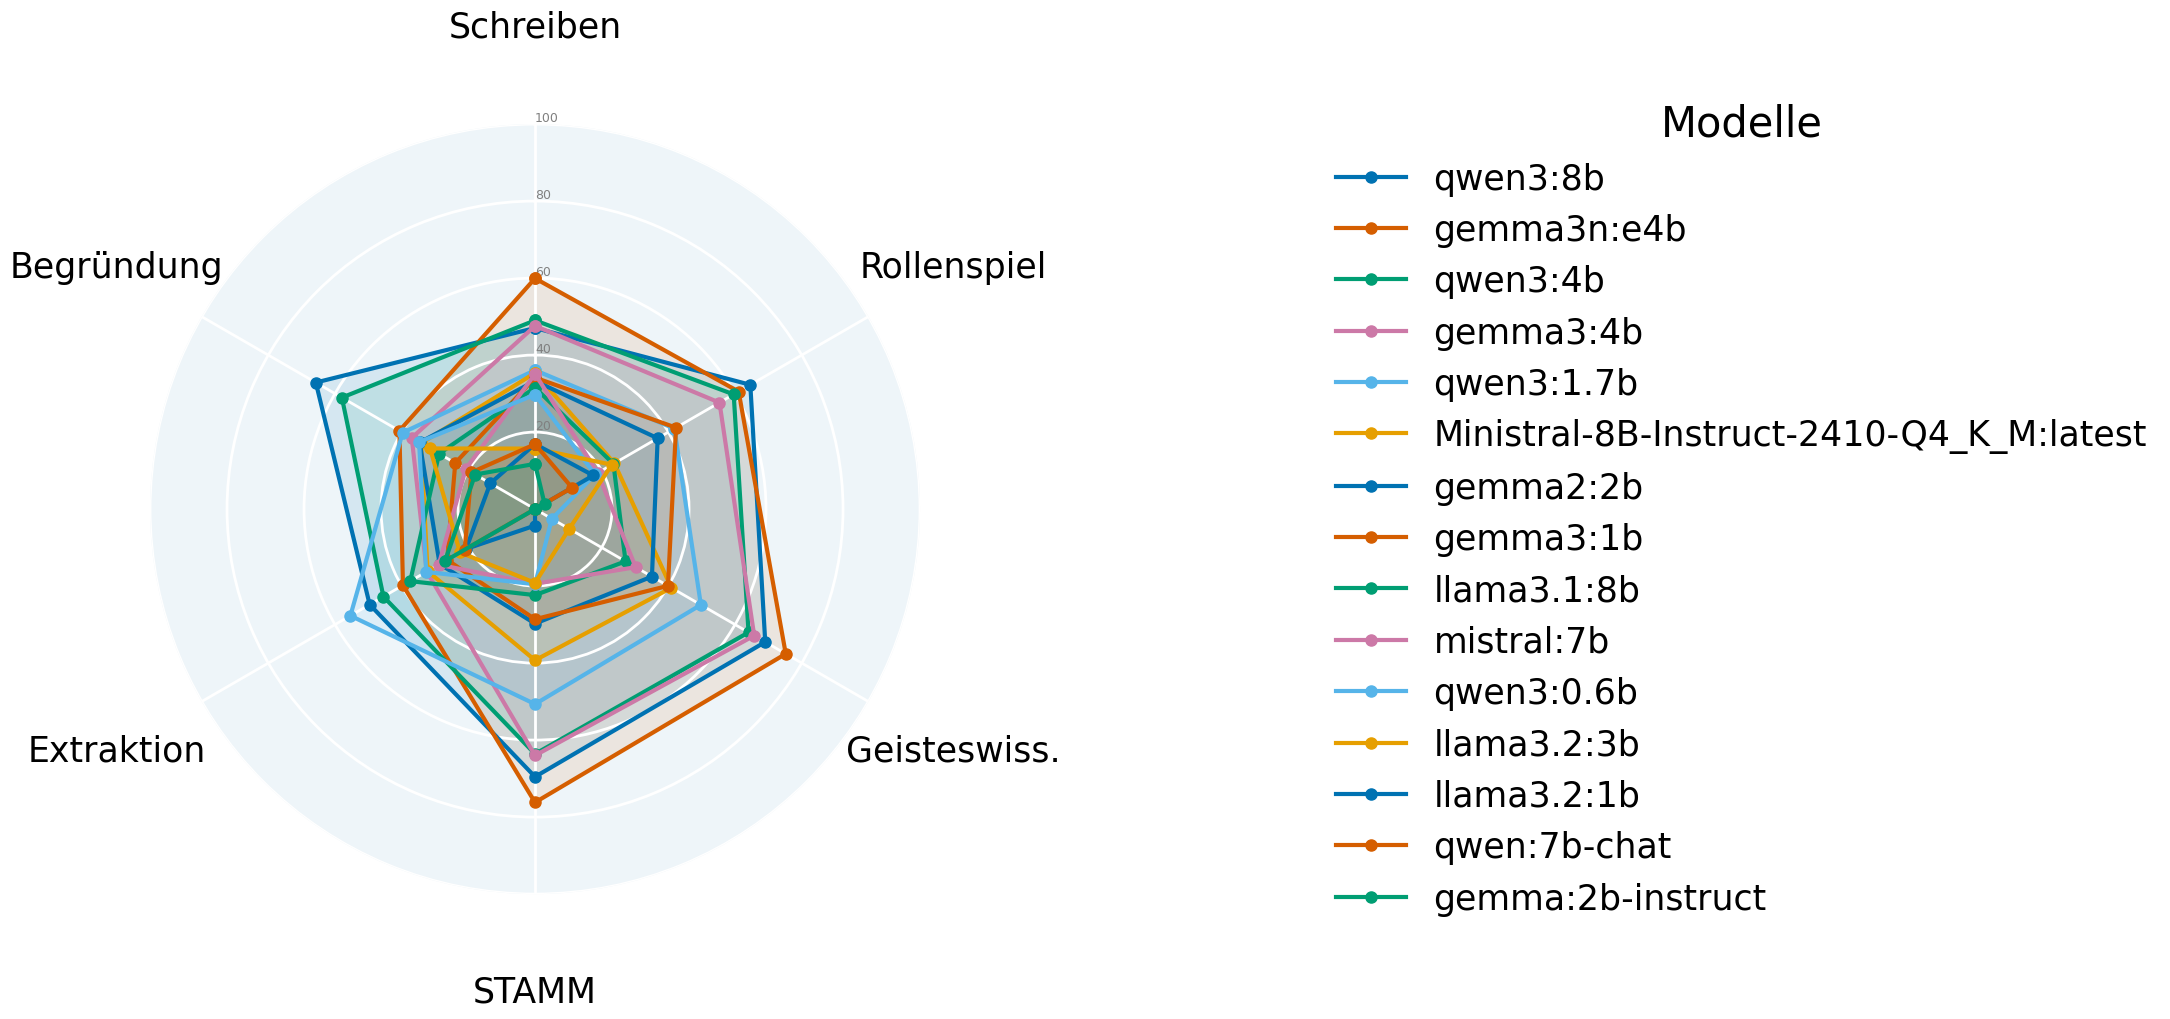

In [149]:
import json
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, Any, List
import math

def create_single_publication_radar_chart(results_file_path: str, config_file_path: str):
    """
    Erstellt ein einzelnes, publikationsreifes Radar-Diagramm, das die Top-Modelle
    übersichtlich vergleicht. Optimiert für den Einsatz in wissenschaftlichen Arbeiten.
    """
    # --- Konfigurationsparameter für die Publikation ---
    ELO_RANGE_MIN, ELO_RANGE_MAX = 700, 1600

    
    try:
        plt.rcParams['font.family'] = 'Garamond'
    except:
        print("Hinweis: 'Garamond' nicht gefunden. Es wird eine Standard-Serifenschrift verwendet.")
        plt.rcParams['font.family'] = 'serif'

    # Farbenblind-freundliche Palette und unterschiedliche Marker
    COLORS_PALETTE = ['#0072B2', '#D55E00', '#009E73', '#CC79A7', '#56B4E9', '#E69F00']
    MARKER_STYLES = ['o', 's', '^', 'D', 'v', 'p', '*']

    # --- KATEGORIE-KONFIGURATION ---
    JSON_CATEGORY_ORDER = [
        'schreiben', 'rollenspiel', 'geisteswissenschaften', 'stamm', 
        'extraktion', 'coding', 'math', 'begründung'
    ]
    CATEGORY_DISPLAY_MAP = {
        'schreiben': 'Schreiben', 'rollenspiel': 'Rollenspiel', 'begründung': 'Begründung',
        'math': 'Math', 'coding': 'Coding', 'extraktion': 'Extraktion',
        'stamm': 'STAMM', 'geisteswissenschaften': 'Geisteswiss.'
    }

    # 1. Daten laden
    try:
        with open(results_file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        models_data = data.get("models", {})
    except (FileNotFoundError, json.JSONDecodeError) as e:
        print(f"Info: '{results_file_path}' nicht gefunden. Erstelle Dummy-Daten zum Testen. Fehler: {e}")
        models_data = {
            "qwen3:8b": {"elo_rating_by_category": {"schreiben": 1450, "rollenspiel": 1500, "begründung": 1350, "extraktion": 1250, "stamm": 1280, "geisteswissenschaften": 1480, "math": 1100, "coding": 1150}},
            "gemma3n:e4b": {"elo_rating_by_category": {"schreiben": 1300, "rollenspiel": 1250, "begründung": 1400, "extraktion": 1350, "stamm": 1420, "geisteswissenschaften": 1200, "math": 1380, "coding": 1400}},
            "mistral:7b": {"elo_rating_by_category": {"schreiben": 1150, "rollenspiel": 1100, "begründung": 1200, "extraktion": 1180, "stamm": 1250, "geisteswissenschaften": 1120, "math": 1280, "coding": 1320}},
            "llama3.2:3b": {"elo_rating_by_category": {"schreiben": 1200, "rollenspiel": 1300, "begründung": 1250, "extraktion": 1300, "stamm": 1100, "geisteswissenschaften": 1350, "math": 1150, "coding": 1250}},
            "gemma2:2b": {"elo_rating_by_category": {"schreiben": 1050, "rollenspiel": 1150, "begründung": 1100, "extraktion": 1080, "stamm": 1000, "geisteswissenschaften": 1180, "math": 1020, "coding": 1050}},
        }
        if not models_data: return

    # Daten vorbereiten
    all_data_categories = set(cat for d in models_data.values() for cat in d.get("elo_rating_by_category", {}).keys())
    categories_to_plot = [cat for cat in JSON_CATEGORY_ORDER if cat in all_data_categories]
    if not categories_to_plot: return

    model_avg_elos = {name: np.mean(list(d.get("elo_rating_by_category", {}).values())) for name, d in models_data.items() if d.get("elo_rating_by_category")}
    model_names_sorted = sorted(model_avg_elos, key=model_avg_elos.get, reverse=True)

    # Nur die Top-Modelle für die Anzeige auswählen
    models_to_plot = model_names_sorted

    def normalize(v):
        return 100 * (np.clip(v, ELO_RANGE_MIN, ELO_RANGE_MAX) - ELO_RANGE_MIN) / (ELO_RANGE_MAX - ELO_RANGE_MIN)

    normalized_data = {name: [normalize(models_data[name].get("elo_rating_by_category", {}).get(cat, ELO_RANGE_MIN)) for cat in categories_to_plot] for name in models_to_plot}

    # --- PLOT-SETUP MIT MATPLOTLIB ---
    num_vars = len(categories_to_plot)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1] # Schließt den Kreis

    # MODIFIZIERT: Figurgröße leicht erhöht, um mehr Platz zu schaffen.
    fig, ax = plt.subplots(figsize=(13, 10), subplot_kw=dict(polar=True))
    
    ax.set_facecolor('#eef5f9')
    ax.spines['polar'].set_visible(False)
    
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    # Achsen und Beschriftungen
    plt.xticks(angles[:-1], [CATEGORY_DISPLAY_MAP.get(cat, cat) for cat in categories_to_plot], color='black', size=25)
    
    # NEU: Fügt einen Abstand (Padding) zwischen den Achsen-Labels und dem Diagramm hinzu.
    ax.tick_params(axis='x', pad=60)

    ax.set_rlabel_position(0)
    plt.yticks([20, 40, 60, 80, 100], ["20", "40", "60", "80", "100"], color="grey", size=9)
    plt.ylim(0, 100)
    ax.grid(True, color='white', linestyle='-', linewidth=2)

    # Daten plotten
    for i, model_name in enumerate(models_to_plot):
        values = normalized_data[model_name]
        values += values[:1] # Schließt den Kreis
        color = COLORS_PALETTE[i % len(COLORS_PALETTE)]
        marker = MARKER_STYLES[0]
        
        linewidth = 2 if i == 0 else 1.5 # Top-Modell etwas dicker
        
        ax.plot(angles, values, color=color, linewidth=3, linestyle='solid', marker=marker, markersize=8, label=model_name)
        ax.fill(angles, values, color=color, alpha=0.1)

    # Legende rechts vom Diagramm mit Titel "Modelle".
    ax.legend(title='Modelle', loc='center left', bbox_to_anchor=(1.5, 0.5), frameon=False, fontsize=25, title_fontsize=30)

    # --- SPEICHERN DER GRAFIK ---
    output_filename = 'radar_chart.png'
    plt.savefig(output_filename, dpi=300, bbox_inches='tight', transparent=False)
    print(f"Diagramm wurde als '{output_filename}' gespeichert.")

    plt.show()

# --- Ausführung ---
json_file = '../data/results.json' 
config_file = '../config/config.yaml'

create_single_publication_radar_chart(json_file, config_file)


Diagramm wurde als 'barchart_average_elo.png' gespeichert.


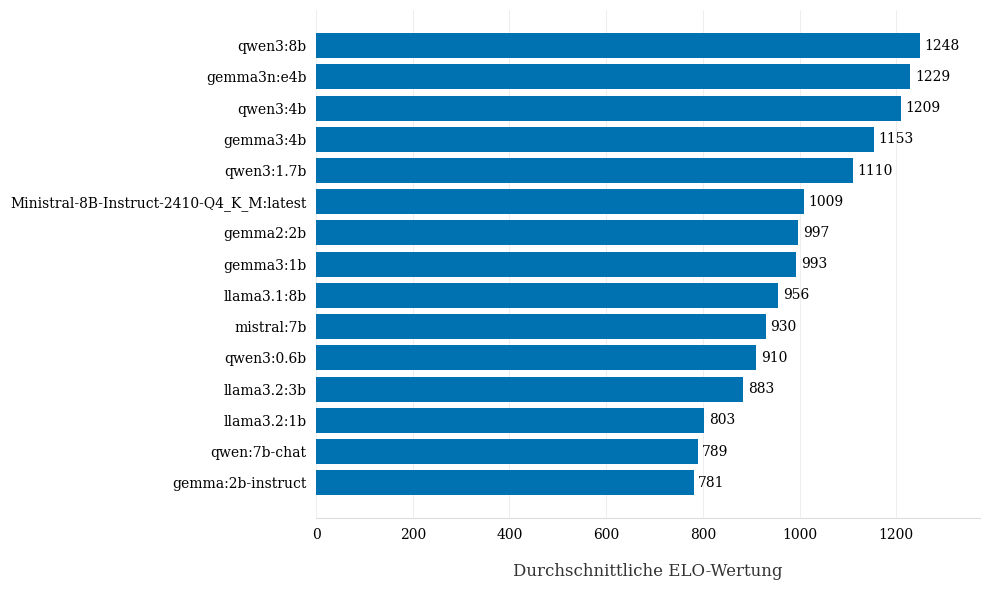

In [88]:
import json
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, Any

def create_average_elo_barchart(results_file_path: str, config_file_path: str):
    """
    Erstellt ein professionelles, horizontales Balkendiagramm, das die durchschnittliche
    ELO-Wertung der Modelle vergleicht. Optimiert für wissenschaftliche Arbeiten.
    """
    # --- Konfigurationsparameter für die Publikation ---
    X_AXIS_LABEL = 'Durchschnittliche ELO-Wertung'
    BAR_COLOR = '#0072B2' # Einzelne, professionelle Farbe für alle Balken
    
    

    # 1. Daten laden
    try:
        with open(results_file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        models_data = data.get("models", {})
    except (FileNotFoundError, json.JSONDecodeError) as e:
        print(f"Info: '{results_file_path}' nicht gefunden. Erstelle Dummy-Daten zum Testen. Fehler: {e}")
        models_data = {
            "qwen3:8b": {"elo_rating_by_category": {"schreiben": 1450, "rollenspiel": 1500, "begründung": 1350, "extraktion": 1250, "stamm": 1280, "geisteswissenschaften": 1480, "math": 1100, "coding": 1150}},
            "gemma3n:e4b": {"elo_rating_by_category": {"schreiben": 1300, "rollenspiel": 1250, "begründung": 1400, "extraktion": 1350, "stamm": 1420, "geisteswissenschaften": 1200, "math": 1380, "coding": 1400}},
            "mistral:7b": {"elo_rating_by_category": {"schreiben": 1150, "rollenspiel": 1100, "begründung": 1200, "extraktion": 1180, "stamm": 1250, "geisteswissenschaften": 1120, "math": 1280, "coding": 1320}},
            "llama3.2:3b": {"elo_rating_by_category": {"schreiben": 1200, "rollenspiel": 1300, "begründung": 1250, "extraktion": 1300, "stamm": 1100, "geisteswissenschaften": 1350, "math": 1150, "coding": 1250}},
            "gemma2:2b": {"elo_rating_by_category": {"schreiben": 1050, "rollenspiel": 1150, "begründung": 1100, "extraktion": 1080, "stamm": 1000, "geisteswissenschaften": 1180, "math": 1020, "coding": 1050}},
        }
        if not models_data: return

    # 2. Durchschnittliche ELO-Werte berechnen
    model_avg_elos = {}
    for name, details in models_data.items():
        if 'elo_rating_by_category' in details and details['elo_rating_by_category']:
            avg_score = np.mean(list(details['elo_rating_by_category'].values()))
            model_avg_elos[name] = avg_score

    if not model_avg_elos:
        print("Keine Modelldaten zur Berechnung von Durchschnittswerten gefunden.")
        return

    # 3. Modelle nach Durchschnittswertung sortieren
    sorted_models = sorted(model_avg_elos.items(), key=lambda item: item[1], reverse=False)
    model_names = [item[0] for item in sorted_models]
    avg_scores = [item[1] for item in sorted_models]

    # --- PLOT-SETUP MIT MATPLOTLIB ---
    fig, ax = plt.subplots(figsize=(10, 6))

    # Horizontale Balken erstellen
    bars = ax.barh(model_names, avg_scores, color=BAR_COLOR)

    # Achsen und Gitterlinien für ein sauberes Aussehen entfernen
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#dddddd')
    ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)
    ax.xaxis.grid(True, color='#eeeeee', linestyle='-')

    # Achsenbeschriftungen und Titel
    ax.set_xlabel(X_AXIS_LABEL, labelpad=15, color='#333333', size=12)
    ax.set_ylabel('') # Y-Achsen-Label nicht nötig, da die Modellnamen selbsterklärend sind
    
    # Daten-Labels zu den Balken hinzufügen
    for bar in bars:
        width = bar.get_width()
        label_x_pos = width + 10 # Position rechts neben dem Balken
        ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width:.0f}', 
                va='center', ha='left', color='black', size=10)

    # X-Achsen-Limit anpassen, um Platz für die Labels zu schaffen
    ax.set_xlim(right=max(avg_scores) * 1.1)

    # Layout anpassen
    plt.tight_layout()

    # --- SPEICHERN DER GRAFIK ---
    output_filename = 'barchart_average_elo.png'
    plt.savefig(output_filename, dpi=300, bbox_inches='tight')
    print(f"Diagramm wurde als '{output_filename}' gespeichert.")

    plt.show()

# --- Ausführung ---
json_file = '../data/results.json'
config_file = '../config/config.yaml'
create_average_elo_barchart(json_file, config_file)
